# Data Analysis Name: A/B Test and Hypotheses Prioritization

<a name="Head"></a>
### CONTENTS:
* [Project Description](#1.0)
* [Data Source](#1.5)
* [Part 1. Hypothesis Prioritization](#2.0)
> * [Part 1. Conclusion](#2.1)
* [Part 2. A / B Test Analysis](#3.0)
> * [Part 2.1 Build a plot of cumulative revenue by group.](#3.1)
> * [Part 2.2 Build a cumulative average cheque plot for groups.](#3.2)
> * [Part 2.3 Build a plot for the relative change in the cumulative average cheque of group B to group A.](#3.3)
> * [Part 2.4 Build a cumulative conversion plot for groups.](#3.4)
> * [Part 2.5 Build a plot for the relative change in the cumulative conversion of group B to group A.](#3.5)
> * [Part 2.6 Build a scatter plot for the number of orders by visitors.](#3.6)
> * [Part 2.7 Count the 95th and 99th percentiles of the number of orders per visitor.](#3.7)
> * [Part 2.8 Build a scatter plot of order values.](#3.8)
> * [Part 2.9 Calculate the 95th and 99th percentiles of order values.](#3.9)
> * [Part 2.10 Calculate the statistical significance of difference in conversion between groups from raw data.](#3.10)
> * [Part 2.11 Calculate the statistical significance of difference in average cheques between groups by raw data.](#3.11)
> * [Part 2.12 Calculate the statistical significance of difference in conversion between groups using refined data.](#3.12)
> * [Part 2.13 Calculate the statistical significance of difference in average cheques between groups on refined data.](#3.13)
> * [Part 2.14 Decision based on the test results.](#3.14)
> * [Part 2. Conclusion](#3.15)
* [Project Overall Conclusion](#4.0)

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="1.0"></a><br/>

# Project Description 
- Location: Online Store
- Together with the marketing department, prepare a list of hypotheses for increasing revenue
- Prioritize hypotheses, run an A / B test and analyze the results

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="1.5"></a><br/>

## Data Source
- We have three dataframes
> - Hypotheses list with ranking
> - Orders data
> - Visitors data

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 115)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

In [3]:
#pwd

In [4]:
hypothesis_list = pd.read_csv('D:/csv_for_data_analysis/hypothesis_list_local_copy.csv')

orders_row_data = pd.read_csv('D:/csv_for_data_analysis/orders_row_data_local_copy.csv')

visitors_raw_data = pd.read_csv('D:/csv_for_data_analysis/visitors_raw_data_local_copy.csv')

In [5]:
hypothesis_list

,Hypothesis,Reach,Impact,Confidence,Efforts
0,Add two new channels to attract traffic which ...,3,10,8,6
1,Launch your own delivery service which will sh...,2,5,4,10
2,Add blocks of product recommendations to the w...,8,3,7,3
3,Change the structure of categories which will ...,8,3,3,8
4,Change the background color of the home page t...,3,1,1,1
5,Add a page of customer reviews about the store...,3,2,2,3
6,Show banners with current promotions and sales...,5,3,8,3
7,Add a subscription form to all the main pages ...,10,7,8,5
8,Launch a promotion giving a discount on a birt...,1,9,9,5


In [6]:
orders_row_data

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
visitors_raw_data.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="2.0"></a><br/>


## Part 1. Hypotheses Prioritization
#### In the file "hypothesis_list_local_copy.csv" there are 9 hypotheses for increasing the revenue of an online store with the specified parameters Reach, Impact, Confidence, Effort
> Task
> - Use the ICE framework to prioritize hypotheses. Sort in descending order of priority
> - Use the RICE framework to prioritize hypotheses. Sort in descending order of priority
> - Let's look how the prioritization of hypotheses has changed when applying RICE instead of ICE. What is an explaination.

In [8]:
# ICE
hypothesis_list_ice = hypothesis_list
hypothesis_list_ice['ICE_score'] = (
    hypothesis_list_ice['Impact'] * hypothesis_list_ice['Confidence']) / hypothesis_list_ice['Efforts']

hypothesis_list_ice[['Hypothesis','ICE_score']].sort_values(by='ICE_score', ascending=False)

,Hypothesis,ICE_score
8,Launch a promotion giving a discount on a birt...,16.200
0,Add two new channels to attract traffic which ...,13.333
7,Add a subscription form to all the main pages ...,11.200
6,Show banners with current promotions and sales...,8.000
2,Add blocks of product recommendations to the w...,7.000
1,Launch your own delivery service which will sh...,2.000
5,Add a page of customer reviews about the store...,1.333
3,Change the structure of categories which will ...,1.125
4,Change the background color of the home page t...,1.000


- ICE framework: leaders - ## 8-0-7, second group - ## 6-2-1, last priority - ## 5-3-4

In [9]:
# RICE
hypothesis_list_rice = hypothesis_list
hypothesis_list_rice['RICE_score'] = (
    hypothesis_list_rice['Reach'] * hypothesis_list_rice['Impact'] * 
    hypothesis_list_rice['Confidence']) / hypothesis_list_rice['Efforts']

hypothesis_list_rice[['Hypothesis','RICE_score']].sort_values(by='RICE_score', ascending=False)

,Hypothesis,RICE_score
7,Add a subscription form to all the main pages ...,112.000
2,Add blocks of product recommendations to the w...,56.000
0,Add two new channels to attract traffic which ...,40.000
6,Show banners with current promotions and sales...,40.000
8,Launch a promotion giving a discount on a birt...,16.200
3,Change the structure of categories which will ...,9.000
1,Launch your own delivery service which will sh...,4.000
5,Add a page of customer reviews about the store...,4.000
4,Change the background color of the home page t...,3.000


- RICE framework: first leader group - ## 7-2-0, second group - ##6-8-3, least priority group - ## 1-5-4

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="2.1"></a><br/>

## Part 1. Conclusion:
* Hypotheses 7, 2, 3 got higher places through the RICE calculation because the Reach parameter ("how many users will be affected by the change you want to make") in the RICE calculation for these hypotheses gave a high aggregate numerator with equal Efforts efforts in the denominator

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.0"></a><br/>

## Part 2. A / B Test Analysis
#### We have already did an A / B test and got the results described in the files /orders*.csv и /visitors*.csv
> Task
> - Analyze A / B Test
> - Сonclude whether to continue the test or to stop it

#### Make some data research to find extremes or unusual data

In [10]:
orders_row_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
# date data to date format - ! no need (left as str)

orders_data = orders_row_data

#orders_data['date'] = orders_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) #datetime64[ns]

#orders_data['date'] = pd.to_datetime(orders_data['date'], format='%Y-%m-%d') #datetime64[ns]

In [12]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
orders_data['date'].min()

'2019-08-01'

In [14]:
orders_data['date'].max()

'2019-08-31'

> time period is limited by August

In [15]:
orders_data.duplicated().sum()

0

In [16]:
orders_data['transactionId'].duplicated().sum()

0

In [17]:
# check statistical data

orders_data.describe()

,transactionId,visitorId,revenue
count,1197.000,1197.000,1197.000
mean,2155621385.530,2165960143.099,8348.006
std,1229084904.760,1236014192.147,39191.132
min,1062393.000,5114589.000,50.000
25%,1166775572.000,1111826046.000,1220.000
50%,2145193898.000,2217984702.000,2978.000
75%,3237740112.000,3177606451.000,8290.000
max,4293855558.000,4283872382.000,1294500.000


> looks like we have extreme high numbers in revenue column

In [18]:
# check top10 purchases by revenue

pivot_top10_purchases = orders_data.pivot_table(
    index='transactionId', values = 'revenue').sort_values(by='revenue', ascending=False).head(10)
pivot_top10_purchases

,revenue
transactionId,
590470918,1294500
3936777065,202740
192721366,93940
666610489,92550
3668308183,86620
1216533772,78990
1811671147,78990
3603576309,67990
1348774318,66350


> two top purchases too high for our 75% purchases, others in top 10 are expensive as well

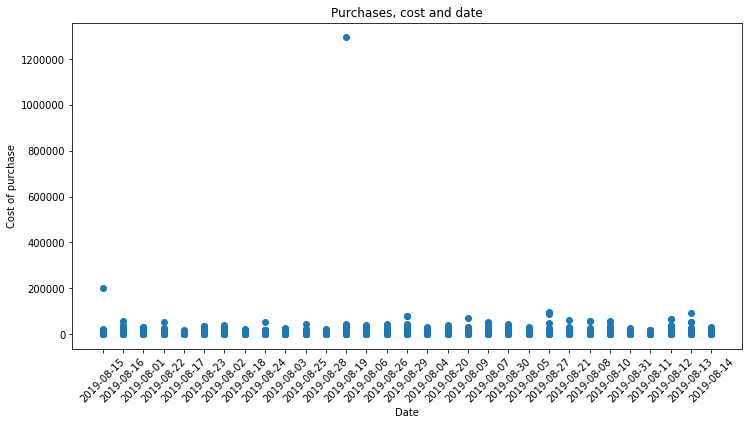

In [19]:
# plot transactions' costs on date

plt.figure(figsize=(12,6))
plt.scatter(orders_data['date'], orders_data['revenue'])
#plt.xlim(['2019-07-30', '2019-09-02'])
plt.title('Purchases, cost and date')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Cost of purchase')
plt.show()

> two most expensive purchases appeared on Aug 15 and Aug 19

In [20]:
# group A and B

orders_data['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

> groups are represented by 557 (A) and 640 (B) transactions

In [21]:
visitors_purchases_number = orders_data['visitorId'].value_counts()
#visitors_purchases_number = orders_data['visitorId'].value_counts().mean()
visitors_purchases_number#.head(20)

4256040402    11
2458001652    11
2378935119     9
2038680547     8
3717692402     5
              ..
3254689071     1
4186744110     1
1455861274     1
3612778094     1
3149228032     1
Name: visitorId, Length: 1031, dtype: int64

> two costomers have 11 purchases, few have - 9 & 8, then the number stays on 5 and drops gradually down to 1

Text(0, 0.5, 'Number of purchases')

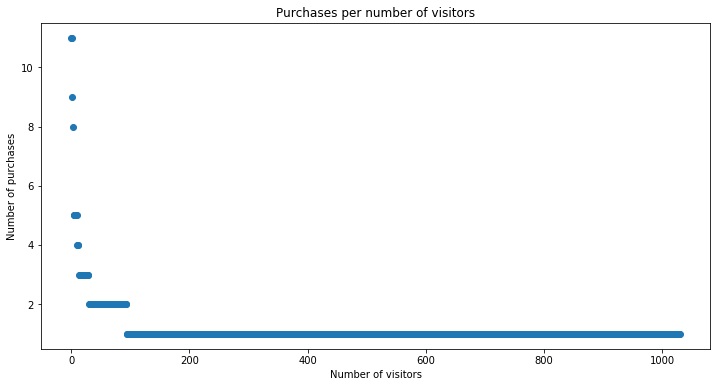

In [22]:
plt.figure(figsize=(12,6))
x_values = pd.Series(range(0,len(visitors_purchases_number)))
plt.scatter(x_values, visitors_purchases_number)
plt.title('Purchases per number of visitors')
plt.xlabel('Number of visitors')
plt.ylabel('Number of purchases')

> is not a normal distribution: most purchase ones, much less purchase twice and more

In [23]:
# check the revenue per visitor

visitor_id_revenue = orders_data.pivot_table(
    index='visitorId', values = 'revenue', aggfunc='sum').sort_values(by='revenue', ascending=False)
visitor_id_revenue

,revenue
visitorId,
1920142716,1294500
2108080724,202740
4256040402,176490
4266935830,157980
2378935119,142939
...,...
1995481842,70
3577713868,60
2738601405,50


In [24]:
# check total revenue from those visitors who made 11 purchases

print(visitor_id_revenue.query('visitorId == 4256040402'))
print()
print(visitor_id_revenue.query('visitorId == 2458001652'))

            revenue
visitorId          
4256040402   176490

            revenue
visitorId          
2458001652    62098


> those visitors not bringing extreme revenue: 176 490 & 62 098 rubles

In [25]:
orders_data.query('revenue == 1294500')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


In [26]:
orders_data.query('visitorId == 1920142716')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B


> the most expensive purchase (1 294 500) was made by one visitor from group B who performed just one purchase per period

In [27]:
# transactions by date by groups

pivot_plot_transactions = orders_data.pivot_table(
    index='date', columns='group', values='transactionId', aggfunc='count').reset_index()

pivot_plot_transactions.head()

group,date,A,B
0,2019-08-01,24,21
1,2019-08-02,20,24
2,2019-08-03,24,16
3,2019-08-04,16,17
4,2019-08-05,25,23


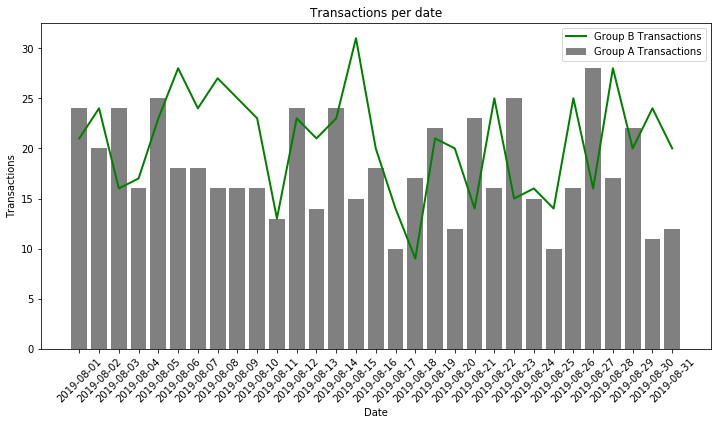

In [28]:
plt.figure(figsize=(12,6))
plt.bar(pivot_plot_transactions['date'], pivot_plot_transactions['A'], label='Group A Transactions', color='grey')
plt.plot(
    pivot_plot_transactions['date'], pivot_plot_transactions['B'], label='Group B Transactions', color='green', linewidth=2)
plt.title('Transactions per date')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Transactions')
plt.legend()
plt.show()

> transactions - no extremes

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.1"></a><br/>

### 2.1. Build a plot of cumulative revenue by group. Draw conclusions and assumptions.

In [29]:
# define groups by months

date_groups = orders_data[['date','group']].drop_duplicates()
date_groups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [30]:
# aggregated orders by date with: transactionId-number of unique, visitorId-number of unique, revenue-cumulative

orders_aggregated = date_groups.apply(
    lambda x: orders_data[np.logical_and(orders_data['date'] <= x['date'], orders_data['group'] == 
    x['group'])].agg({
    'date':'max',
    'group':'max',
    'transactionId':pd.Series.nunique,
    'visitorId':pd.Series.nunique,
    'revenue':'sum'}),axis=1).sort_values(by=['date','group'])

orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [31]:
visitors_data = visitors_raw_data

# date data to date format - ! no need (left as str)

#visitors_data['date'] = visitors_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [32]:
# aggregated visitors by date with: visitors-cumulative

visitors_aggregated = date_groups.apply(
    lambda x: visitors_data[np.logical_and(visitors_data['date'] <= x['date'], visitors_data['group'] == 
    x['group'])].agg({
    'date':'max',
    'group':'max',
    'visitors':'sum'}),axis=1).sort_values(by=['date','group'])

visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [33]:
cummulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], 
    right_on=['date', 'group'])

#cummulative_data.head()

In [34]:
cummulative_data.columns = ['date','group','orders','buyers','revenue','visitors']
cummulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [35]:
cummulative_revenue_A = cummulative_data[cummulative_data['group'] == 'A'][['date','revenue','orders']]
cummulative_revenue_B = cummulative_data[cummulative_data['group'] == 'B'][['date','revenue','orders']]

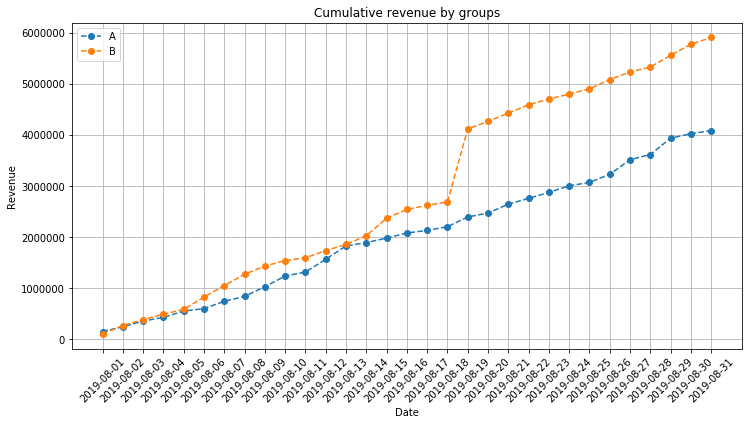

In [36]:
plt.figure(figsize=(12,6))
plt.plot(cummulative_revenue_A['date'], cummulative_revenue_A['revenue'], label='A', marker='o', linestyle='dashed')
plt.plot(cummulative_revenue_B['date'], cummulative_revenue_B['revenue'], label='B', marker='o', linestyle='dashed')
plt.grid()
plt.legend(loc='upper left')
plt.title('Cumulative revenue by groups')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.show()

#### 1. Groups' cumulative revenue chart
#### Conclusions and Assumptions
- groups start the same growth
- group B begins to lead in a week of test
- after 2 weeks of the test, group A almost overtakes group B
- August 19, group B quickly breaks away; more than a million
- the last segment of the group runs almost parallel
- it can be assumed that the sharp increase in the cumulative revenue of group B is caused by abnormally large orders

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.2"></a><br/>

### 2.2. Build a cumulative average cheque plot for groups. Draw conclusions and assumptions.

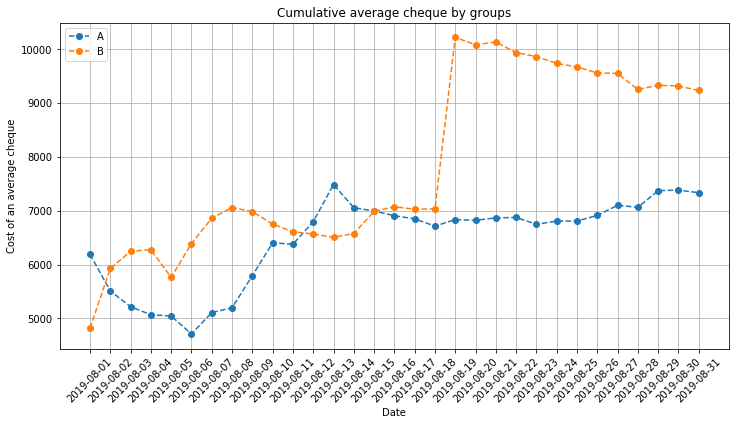

In [37]:
plt.figure(figsize=(12,6))
plt.plot(cummulative_revenue_A['date'], 
         cummulative_revenue_A['revenue'] / cummulative_revenue_A['orders'], label='A', marker='o', linestyle='dashed')
plt.plot(cummulative_revenue_B['date'], 
         cummulative_revenue_B['revenue'] / cummulative_revenue_B['orders'], label='B', marker='o', linestyle='dashed')
plt.grid()
plt.legend(loc='upper left')
plt.title('Cumulative average cheque by groups')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Cost of an average cheque')
plt.show()

#### 2. Cumulative average cheque by groups
#### Conclusions and Assumptions
- the average cheque of group A sags sharply at the beginning of the test, group B goes in waves
- by the end of two weeks of the test, the average cheque of group A for a short period exceeds the average cheque of group B
- On August 19, the average cheque of group B increases sharply by 3 thousand, and then gradually decreases by 1 thousand units over the past 12 days: the cause is the expensive purchase on this date
- the average cheque of group A remains at the level of 7000 units and gradually increases towards the end of the test
- based on the fact that the fluctuations are very strong, it is too early to decide on this metric
- An additional analysis of extreme values is required: it affects the results so much

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.3"></a><br/>

### 2.3. Build a plot of the relative change in the cumulative average cheque of group B to group A. Draw conclusions and assumptions.

In [38]:
merged_сummulative_revenue = cummulative_revenue_A.merge(
    cummulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

merged_сummulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


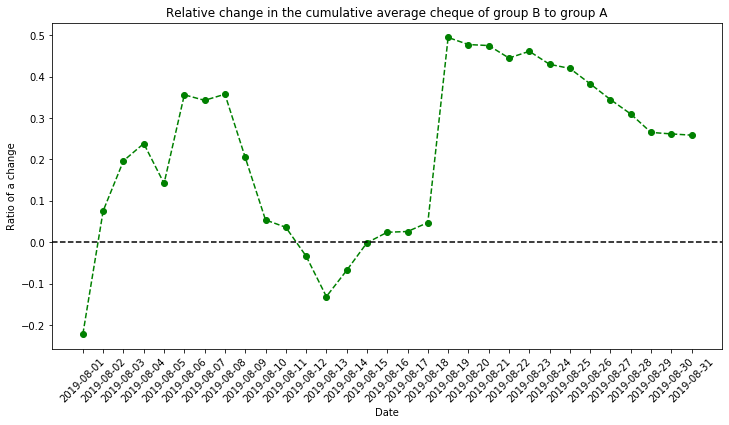

In [39]:
plt.figure(figsize=(12,6))
plt.plot(merged_сummulative_revenue['date'], (
    merged_сummulative_revenue['revenueB'] / merged_сummulative_revenue['ordersB']) / (
    merged_сummulative_revenue['revenueA'] / merged_сummulative_revenue['ordersA']) -1, 
    marker='o', linestyle='dashed', color='g')

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative change in the cumulative average cheque of group B to group A')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Ratio of a change')
plt.show()

#### 3. Plot for the relative change in the cumulative average cheque of group B to group A
#### Conclusions and Assumptions
- significant fluctuations are observed from the first days of the test and last 2 weeks from -2 to +4
- and the anomaly is confirmed on August 19
- it is necessary to search for abnormal orders in the dataset

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.4"></a><br/>

### 2.4. Build a cumulative conversion plot for groups. Draw conclusions and assumptions.

In [40]:
cummulative_data['conversion'] = cummulative_data['orders'] / cummulative_data['visitors']

cummulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033
1,2019-08-01,B,21,20,101217,713,0.029
2,2019-08-02,A,44,38,242401,1338,0.033
3,2019-08-02,B,45,43,266748,1294,0.035
4,2019-08-03,A,68,62,354874,1845,0.037


In [41]:
cummulative_data_A = cummulative_data[cummulative_data['group']=='A']
cummulative_data_B = cummulative_data[cummulative_data['group']=='B']

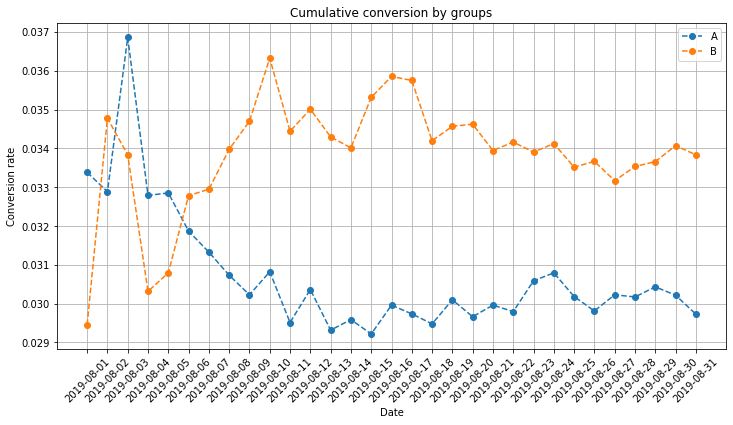

In [42]:
plt.figure(figsize=(12,6))
plt.plot(cummulative_data_A['date'], cummulative_data_A['conversion'], label='A', marker='o', linestyle='dashed')
plt.plot(cummulative_data_B['date'], cummulative_data_B['conversion'], label='B', marker='o', linestyle='dashed')
plt.grid()
plt.legend()
plt.title('Cumulative conversion by groups')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Conversion rate')
plt.show()

In [43]:
cummulative_data_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 60
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        31 non-null     object 
 1   group       31 non-null     object 
 2   orders      31 non-null     int64  
 3   buyers      31 non-null     int64  
 4   revenue     31 non-null     int64  
 5   visitors    31 non-null     int64  
 6   conversion  31 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.9+ KB


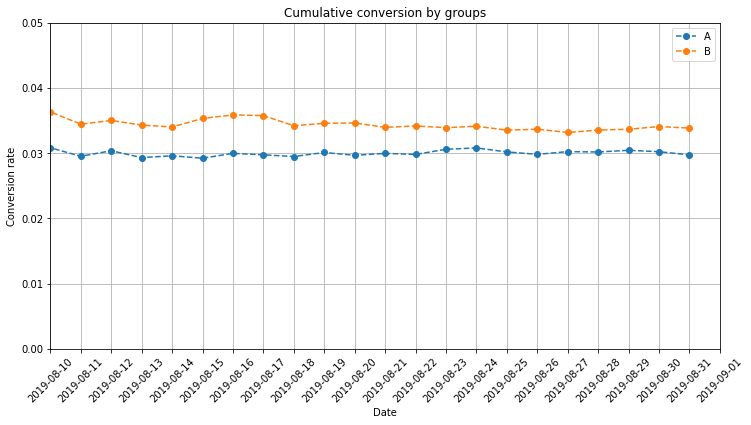

In [44]:
plt.figure(figsize=(12,6))
plt.plot(cummulative_data_A['date'], cummulative_data_A['conversion'], label='A', marker='o', linestyle='dashed')
plt.plot(cummulative_data_B['date'], cummulative_data_B['conversion'], label='B', marker='o', linestyle='dashed')
plt.grid()
plt.legend()
plt.axis(["2019-08-10", "2019-09-01", 0, 0.05])
plt.title('Cumulative conversion by groups')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Conversion rate')
plt.show()

#### 4. Group cumulative conversion chart
#### Conclusions and Assumptions
- the first 5 days of the test, the conversion of group A was in the lead
- then the conversion of group B came in first place
- from the 10th conversion stabilized around their average
- the conversion of group B is consistently higher than the last two weeks of the test, however, in the long term, the advantage can be nullified

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.5"></a><br/>

### 2.5. Build a plot for the relative change in the cumulative conversion of group B to group A. Draw conclusions and assumptions.

In [45]:
merged_сummulative_сonversions = cummulative_data_A[['date','conversion']].merge(
    cummulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

merged_сummulative_сonversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033,0.029
1,2019-08-02,0.033,0.035
2,2019-08-03,0.037,0.034
3,2019-08-04,0.033,0.030
4,2019-08-05,0.033,0.031


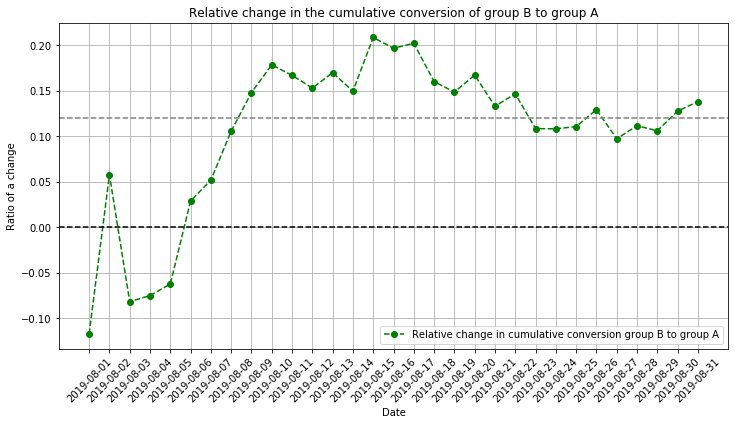

In [46]:
plt.figure(figsize=(12,6))
plt.plot(merged_сummulative_сonversions['date'], merged_сummulative_сonversions['conversionB'] / 
         merged_сummulative_сonversions['conversionA'] - 1, 
         label="Relative change in cumulative conversion group B to group A", marker='o', linestyle='dashed', color='g')
plt.grid()
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.title('Relative change in the cumulative conversion of group B to group A')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Ratio of a change')
plt.show()

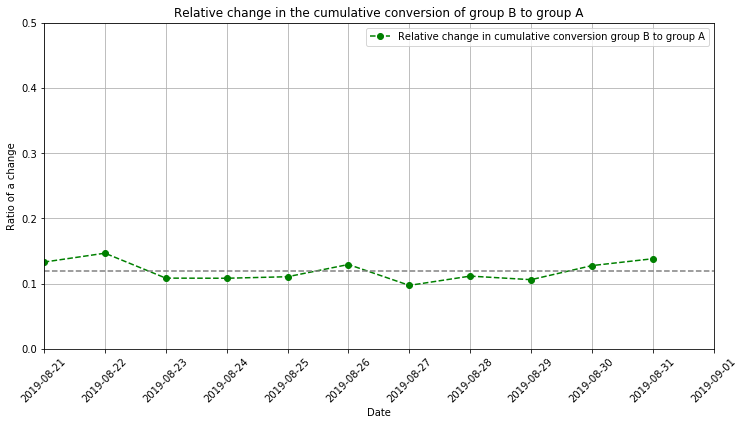

In [47]:
plt.figure(figsize=(12,6))
plt.plot(merged_сummulative_сonversions['date'], merged_сummulative_сonversions['conversionB'] / 
         merged_сummulative_сonversions['conversionA'] - 1, 
         label="Relative change in cumulative conversion group B to group A", marker='o', linestyle='dashed', color='g')
plt.grid()
plt.legend()
#plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axis(["2019-08-21", '2019-09-01', 0, 0.5])
plt.title('Relative change in the cumulative conversion of group B to group A')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Ratio of a change')
plt.show()

#### 5. Plot for the relative change in the cumulative conversion of group B to group A
#### Conclusions and Assumptions
- strong fluctuations of the first 9 days have come to naught in the middle part of the test
- after the 21st, the conversion gain stabilized around the figure of 0.12
- the relative change in the conversion of group B is stably positive after the first week of the test

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.6"></a><br/>

### 2.6. Build a scatter plot for the number of orders by visitors. Draw conclusions and assumptions.

In [48]:
orders_by_user = orders_data.drop(['group','revenue','date'], axis=1).groupby(
    'visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
orders_by_user.columns = ['userId','orders']

orders_by_user.sort_values(by='orders', ascending=False).head()

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


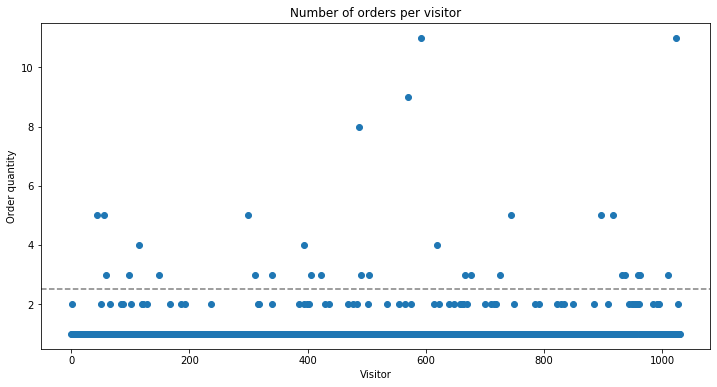

In [49]:
# Series from 0 to observation number in orders_by_user
x_values = pd.Series(range(0,len(orders_by_user)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders_by_user['orders'])
plt.axhline(y=2.5, color='grey', linestyle='--')
plt.title('Number of orders per visitor')
plt.xlabel('Visitor')
plt.ylabel('Order quantity')
plt.show()

#### 6. Scatter chart of the number of orders per users
#### Conclusions and Assumptions
- most of the users ordered one-time
- a relatively large portion of users ordered twice
- 3 or more orders are rare
- must be calculated through percentiles

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.7"></a><br/>

### 2.7. Count the 95th and 99th percentiles of the number of orders per user. Select a border to identify abnormal users.

In [50]:
np.percentile(orders_by_user['orders'], [95, 99])

array([2., 4.])

In [51]:
np.percentile(orders_by_user['orders'], [97.2, 98.9])

array([3., 4.])

#### 7. 95th and 99th percentiles of the number of orders per user
#### Border to identify abnormal users
- no more than 5% of users ordered 3 or more times (more precisely - 2.8%)
- no more than 1% of users ordered 4 or more times (more precisely - 1.1%)
- most likely we need to have a limit after 2 orders

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.8"></a><br/>

### 2.8. Build a scatter plot of order values. Draw conclusions and assumptions.

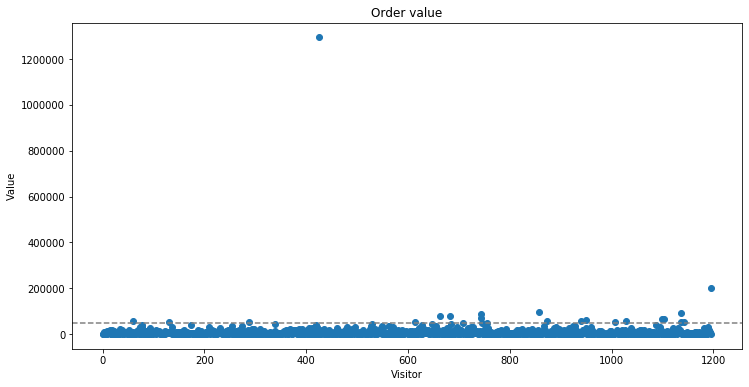

In [52]:
# Series from 0 to observation number in orders_by_user
x_values = pd.Series(range(0,len(orders_data['revenue'])))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders_data['revenue'])
plt.axhline(y=50000, color='grey', linestyle='--')
plt.title('Order value')
plt.xlabel('Visitor')
plt.ylabel('Value')
plt.show()

#### 8. Scatter plot of order values
#### Conclusions and Assumptions
- if most of the orders are within 50,000 rubles, we see several orders of very high cost, more than a million rubles and about 200,000 rubles
- it can be assumed that the border should be set at about 50,000 rubles
- check through percentiles
- we observe two large orders which are ubnormal in our case

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.9"></a><br/>

### 2.9. Calculate the 95th and 99th percentiles of order values. Select a boundary to determine abnormal orders.

In [53]:
np.percentile(orders_data['revenue'], [95, 99])

array([28000. , 58233.2])

In [54]:
np.percentile(orders_data['revenue'], [96, 97, 98])

array([31382. , 35485. , 44133.2])

#### 9. 95th and 99th percentiles of order value
#### Boundary for determining abnormal orders
- no more than 5% of orders have a value above 28,000 rubles
- no more than 1% of orders have a value above 58 233 rubles
- between 2 and 1 percent a big step: from 44 and 58 thousand rubles
- most likely the border must be after the 98th percentile, i.e. 44 133 rubles

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.10"></a><br/>

### 2.10. Calculate the statistical significance of differences in conversion between groups from raw data. Draw conclusions and assumptions.

> Let us state the Null Hypothesis H0 that the conversions by groups based on 'raw' data are equal using the Mann-Whitney U test; The alternative hypothesis H1 is that the conversions are not equal

In [55]:
# Get aggregated table for the calculation of statistical significances

visitors_A_daily = visitors_data[visitors_data['group']=='A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitorsPerDateA']

visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitors_A_cummulative.columns = ['date', 'visitorsCummulativeA']

visitors_B_daily = visitors_data[visitors_data['group']=='B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitorsPerDateB']

visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitors_B_cummulative.columns = ['date', 'visitorsCummulativeB']

In [56]:
orders_A_daily = orders_data[orders_data['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
orders_A_daily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

orders_A_cummulative = orders_A_daily.apply(
    lambda x:orders_A_daily[orders_A_daily['date'] <= x['date']].agg({
        'date' : 'max', 'ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
orders_A_cummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [57]:
orders_B_daily = orders_data[orders_data['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
orders_B_daily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

orders_B_cummulative = orders_B_daily.apply(
    lambda x:orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date' : 'max', 'ordersPerDateB' : 'sum', 'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
orders_B_cummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [58]:
data_aggregated = orders_A_daily.merge(orders_B_daily, left_on='date', right_on='date', how='left')\
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')\
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')\
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')\
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')\
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')\
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')

#data_aggregated.head()

In [59]:
orders_by_users_A = orders_data[orders_data['group'] == 'A'].groupby('visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})
orders_by_users_A.columns = ['userId', 'orders']

orders_by_users_B = orders_data[orders_data['group'] == 'B'].groupby('visitorId', as_index=False).agg(
    {'transactionId' : pd.Series.nunique})
orders_by_users_B.columns = ['userId', 'orders']

In [60]:
sample_A = pd.concat([orders_by_users_A['orders'],pd.Series(0, index=np.arange(
    data_aggregated['visitorsPerDateA'].sum() - len(orders_by_users_A['orders'])), name='orders')],axis=0)

sample_B = pd.concat([orders_by_users_B['orders'],pd.Series(0, index=np.arange(
    data_aggregated['visitorsPerDateB'].sum() - len(orders_by_users_B['orders'])), name='orders')],axis=0)

In [61]:
# Statistical significance of differences in conversion by groups (p-value):
print("Statistical significance of differences in conversions by groups (based on raw data) (p-value): {0:.5f}".
      format(stats.mannwhitneyu(sample_A, sample_B)[1]))

Statistical significance of differences in conversions by groups (based on raw data) (p-value): 0.00840


In [62]:
# Relative conversion difference group B to group A
print("Relative conversion difference of group B to group A (raw data): {0:.3f}".
      format((data_aggregated['ordersPerDateB'].sum()/data_aggregated['visitorsPerDateB'].sum())/
                       (data_aggregated['ordersPerDateA'].sum()/data_aggregated['visitorsPerDateA'].sum())-1))

Relative conversion difference of group B to group A (raw data): 0.138


#### 10. The statistical significance of differences in conversion between groups according to the "raw" data
#### Conclusions and Assumptions
- P-value is significantly less than 0.05: the difference in conversions between groups according to the "raw" data is significant
- the difference in conversion gain is high = 14%
- we need to clean the data and repeat the comparison

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.11"></a><br/>

### 2.11. Calculate the statistical significance of the difference in the average cheques between groups by raw data. Draw conclusions and assumptions.

> Let us state the Null Hypothesis H0 that average cheques by groups based on 'raw' data are equal using the Mann-Whitney U test; The alternative hypothesis H1 is that average cheques of each group are not equal

In [63]:
# p-value to compare average cheque between groups (raw data)
print("Statistical significance of difference in the average cheques of each group (raw data): {0:.3f}".format(
    stats.mannwhitneyu(orders_data[orders_data['group']=='A']['revenue'], 
                                           orders_data[orders_data['group']=='B']['revenue'])[1]))

Statistical significance of difference in the average cheques of each group (raw data): 0.365


In [64]:
# Relative increase in the average cheque of group B ("raw" data)
print("Relative increase in the average cheque of group B to group A (raw data): {0:.3f}".format(
    orders_data[orders_data['group']=='B']['revenue'].
                       mean()/orders_data[orders_data['group']=='A']['revenue'].mean()-1))

Relative increase in the average cheque of group B to group A (raw data): 0.259


#### 11. The statistical significance of differences in the average order receipt between groups according to raw data
#### Conclusions and Assumptions
- P-value greater than 0.05: there are no statistically significant differences in the average cheque between groups
- relative increase is significant = 26%
- we need to clean the data and repeat the comparison

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.12"></a><br/>

### 2.12. Calculate the statistical significance of differences in conversion between groups using “cleaned” data. Draw conclusions and assumptions.

> Let us state the Null Hypothesis H0 that the conversions by groups based on 'refined' data are equal using the Mann-Whitney U test; The alternative hypothesis H1 is that the conversions are not equal

In [65]:
# Clean data: anomalies > 2 purchases и > 44 133 rubles

users_with_many_orders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] >= 3]['userId'],
                                 orders_by_users_B[orders_by_users_B['orders'] >= 3]['userId']], axis = 0)
#users_with_many_orders

users_with_expensive_orders = orders_data[orders_data['revenue'] > 44133]['visitorId']
#users_with_expensive_orders

abnormal_users = pd.concat([users_with_many_orders,users_with_expensive_orders],
                          axis = 0).drop_duplicates().sort_values(ascending=True)
#abnormal_users.shape

In [66]:
# Variables sample_A_filtered & sample_B_filtered with refined order data - not including abnormal users.
sample_A_filtered = pd.concat([orders_by_users_A[np.logical_not(
    orders_by_users_A['userId'].isin(abnormal_users))]['orders'],pd.Series(
    0, index=np.arange(data_aggregated['visitorsPerDateA'].sum() - len(orders_by_users_A['orders'])),name='orders')],axis=0)

sample_B_filtered = pd.concat([orders_by_users_B[np.logical_not(
    orders_by_users_B['userId'].isin(abnormal_users))]['orders'],pd.Series(
    0, index=np.arange(data_aggregated['visitorsPerDateB'].sum() - len(orders_by_users_B['orders'])),name='orders')],axis=0)

In [67]:
# Comparison of conversion between refined groups
print("Statistical significance of differences in conversions by groups (refined data) p-value: {0:.5f}".
      format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))

Statistical significance of differences in conversions by groups (refined data) p-value: 0.00370


In [68]:
# The relative increase in the conversion of refined group B to refined group A
print("Relative conversion difference of group B to group A (refined data): {0:.3f}".
      format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

Relative conversion difference of group B to group A (refined data): 0.185


#### 12. The statistical significance of differences in conversion between groups according to the "refined" data
#### Conclusions and Assumptions
- P-value is much less than 0.05: = 0.00370, which is even lower than before the "cleansing" of the data (0.00840)
- we can conclude that the increase in the conversion of group B really takes place

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.13"></a><br/>

### 2.13. Calculate the statistical significance of the differences in the average cheque between groups according to the “refined” data. Draw conclusions and assumptions.

> Let us state the Null Hypothesis H0 that average cheques by groups based on 'refined' data are equal using the Mann-Whitney U test; The alternative hypothesis H1 is that average cheques of each group are not equal

In [69]:
# p-value to compare average cheques between refined groups
print("Statistical significance of difference in the average cheques of each group (refined data): {0:.3f}".
      format(stats.mannwhitneyu(
    orders_data[np.logical_and(orders_data['group']=='A',
        np.logical_not(orders_data['visitorId'].isin(abnormal_users)))]['revenue'],
    orders_data[np.logical_and(orders_data['group']=='B',
        np.logical_not(orders_data['visitorId'].isin(abnormal_users)))]['revenue'])[1]))

Statistical significance of difference in the average cheques of each group (refined data): 0.497


In [70]:
# The relative increase in the average cheque of the refined group B
print("Relative increase in the average cheque of group B to group A (refined data): {0:.3f}".
      format(orders_data[np.logical_and(orders_data['group']=='B',
        np.logical_not(orders_data['visitorId'].isin(abnormal_users)))]['revenue'].mean()/
    orders_data[np.logical_and(orders_data['group']=='A',
        np.logical_not(orders_data['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1))

Relative increase in the average cheque of group B to group A (refined data): 0.037


#### 13. The statistical significance of the differences in the average order receipt between groups according to the “refined” data
#### Conclusions and Assumptions
- P-value is significantly higher than 0.05: = 0.497; the average cheque of both groups after removing the extremes is the same
- relative increase insignificant = 3.7%

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.14"></a><br/>

### 2.14. Make a decision based on the test results and explain it.
##### Solution Options:
1. Stop the test, record the win of one of the groups.
2. Stop the test, record the absence of differences between the groups.
3. Continue the test.

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="3.15"></a><br/>

## Part 2. Conclusion:

#### Summary
- Conversion (p-value) 0.0084 ("raw") vs 0.0037 ("refined")
- Conversion (change) 0.138 vs 0.185
- Avg.cheque (p-value) 0.365 vs 0.497
- Avg.cheque (change) 0.259 vs 0.037
- The conversion rate of group B is higher (and not equal to) than the conversion values of group A
- The average cheque of group B is higher (and not equal to) than that of group A, but not much
- The test was carried out for one month
- Over the past two weeks, metric values have stabilized
- Data cleansing confirms the difference for the positive for the metrics of group B
- The relative increase in the conversion of group B to the conversion of group A was 18.5%, this is significant, even with a possible adjustment of the metric in the coming weeks

<a href="#Head"><font size="2">BACK TO CONTENTS</font></a><a name="4.0"></a><br/>

# Solution: stop the test, record that group B has higher conversion rate